# EMOBOT

## Import Modules

In [41]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load Dataset(s)

In [42]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print("Dataset is loaded")

Dataset is loaded


In [43]:
paths[:5]

['Tess\\OAF_angry\\OAF_back_angry.wav',
 'Tess\\OAF_angry\\OAF_bar_angry.wav',
 'Tess\\OAF_angry\\OAF_base_angry.wav',
 'Tess\\OAF_angry\\OAF_bath_angry.wav',
 'Tess\\OAF_angry\\OAF_bean_angry.wav']

In [44]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [45]:
# Creating a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Tess\OAF_angry\OAF_back_angry.wav,angry
1,Tess\OAF_angry\OAF_bar_angry.wav,angry
2,Tess\OAF_angry\OAF_base_angry.wav,angry
3,Tess\OAF_angry\OAF_bath_angry.wav,angry
4,Tess\OAF_angry\OAF_bean_angry.wav,angry


In [46]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Explortory Data Analysis

<Axes: xlabel='count', ylabel='label'>

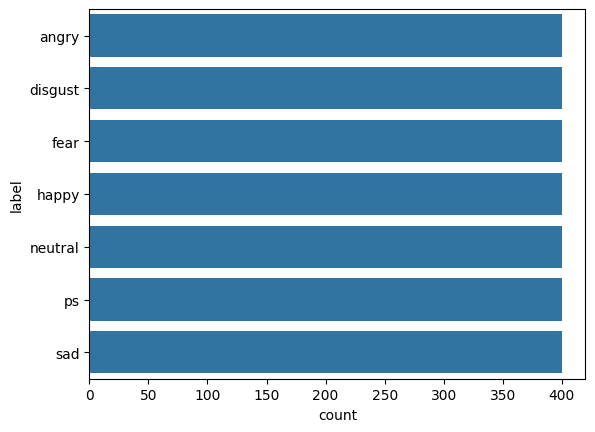

In [47]:
sns.countplot(df['label'])

In [52]:
def waveplot (data, sr, emotions):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotions):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar 


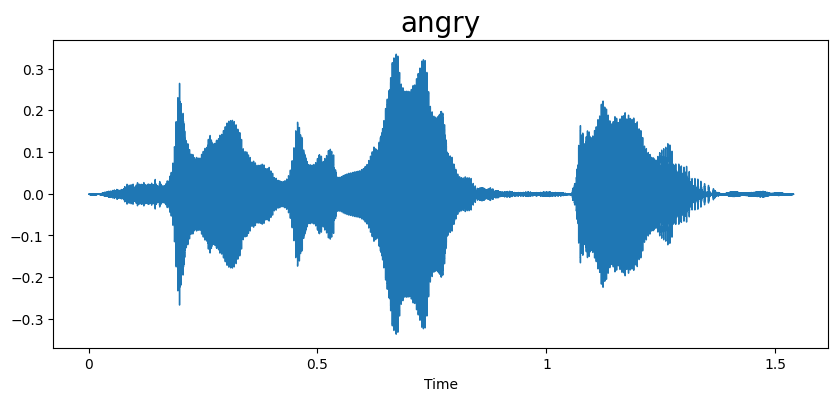

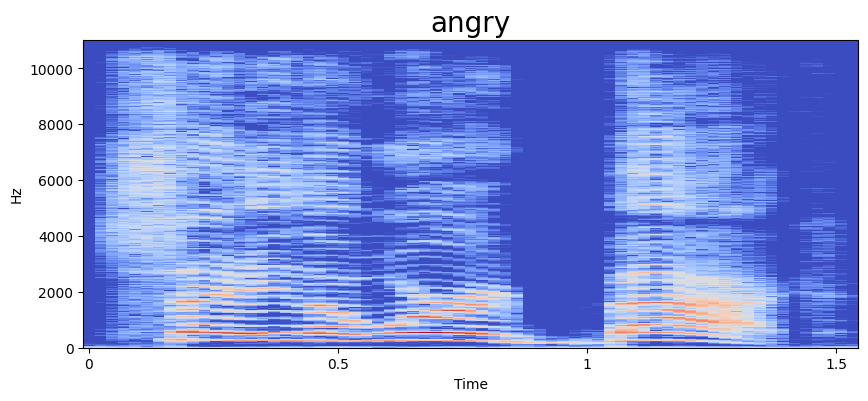

In [53]:
emotion = 'angry'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)